In [53]:
#lbbVIXAnalysis-6-3A
## This is an animation file, that animates the VX term slope daily
## for more information about getting animations to work (especially windows..)
## review this blog https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/


import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import rc, animation
rc('animation', html='html5')

#from JSAnimation import IPython_display
from IPython.display import HTML
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import os
os.getcwd()

'c:\\users\\cinderella\\datasci\\datascience\\elitedatascience\\07-CapstoneProject\\Final'

In [54]:
os.chdir('c:\\users\\cinderella\\datasci\\datascience\\elitedatascience\\07-CapstoneProject\\Final')

In [55]:
##Attempt number three
## Behold, "Year" is not the index for this charted animation effort--it took several attempts to realize this should not
## be the case. Year is going to be a text label that continues to change with each frame
## update.
df= pd.read_csv('vix-01A.csv', index_col=0)

In [56]:
#double check the import
df.head()

,tradeDate,1,2,3,4,5,6,7,8,9,...,curve,nTerm2,fTerm2,curve2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3
698,2007-01-03,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0,...,0.021732,0.072464,0.043934,0.009415,0.067568,0.065574,0.065795,0.061785,0.0,2.038902
699,2007-01-04,12.11,13.16,13.66,14.36,15.12,15.45,0.0,15.90,0.0,...,0.028613,0.037994,0.051587,-0.004486,0.036603,0.066138,-0.974633,0.079787,0.0,2.632979
700,2007-01-05,12.38,13.48,13.83,14.39,15.20,15.50,0.0,15.94,0.0,...,0.029321,0.025964,0.048684,-0.007498,0.025307,0.065789,-1.335912,0.081602,0.0,2.692878
701,2007-01-08,12.25,13.33,13.93,14.34,14.98,15.46,0.0,15.88,0.0,...,0.029094,0.045011,0.060080,-0.004973,0.043073,0.066756,-0.781545,0.081020,0.0,2.673668
702,2007-01-09,12.34,13.21,13.88,14.36,14.88,15.35,0.0,15.89,0.0,...,0.023266,0.050719,0.067876,-0.005662,0.048271,0.067204,-0.624802,0.065859,0.0,2.173354


In [77]:
#Keep only the columns we need
df = df[['tradeDate','1','2','3','4','5','6','7','8','9']]

In [78]:
df.head()

,tradeDate,1,2,3,4,5,6,7,8,9
698,2007-01-03,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0
699,2007-01-04,12.11,13.16,13.66,14.36,15.12,15.45,0.0,15.90,0.0
700,2007-01-05,12.38,13.48,13.83,14.39,15.20,15.50,0.0,15.94,0.0
701,2007-01-08,12.25,13.33,13.93,14.34,14.98,15.46,0.0,15.88,0.0
702,2007-01-09,12.34,13.21,13.88,14.36,14.88,15.35,0.0,15.89,0.0


In [79]:
df.describe()

,1,2,3,4,5,6,7,8,9
count,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000
mean,20.254560,20.964505,21.385189,21.657963,21.899131,21.983269,21.447299,19.885418,15.015435
std,8.769771,7.768627,7.091432,6.599785,6.252359,6.233235,7.353871,8.630705,10.852352
min,8.750000,11.325000,12.225000,12.975000,13.475000,0.000000,0.000000,0.000000,0.000000
25%,14.550000,15.675000,16.431250,16.950000,17.350000,17.675000,17.775000,17.400000,0.000000
50%,17.462500,18.437500,19.000000,19.340000,19.625000,19.825000,19.925000,19.525000,18.350000
75%,23.350000,24.197500,24.647500,24.800000,25.195000,25.500000,25.850000,24.500000,20.868750
max,72.625000,70.475000,59.925000,51.500000,47.070000,45.260000,45.000000,44.450000,44.940000


In [80]:
# Make 3 separate copies of the df
# One to hold the the x variables to plot (EACH VX TERM) (Jan - Dec)
dfx = df.copy()

In [81]:
# One for the y variables (the VALUES for the Month variables)
dfy = df.copy()

In [82]:
# One to hold the t (for TITLE) variables -- the Years
# Which we hope change dynamically with the animation  
dft = df.copy()

In [83]:
### X VAR DF
# for the x variables, get rid of Year
dfx.head()
del dfx['tradeDate']

In [84]:
dfx.head()
dfx.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [85]:
# the variables(columns) are already in the correct order (for the months of the year, meaning
# Jan is First, then we have Feb, Mar and so on..) but this isn't enough. to plot our points
# you will need January's VALUES to have an 'x' value of '1' (their 'y' will be the value for the term)
# so they (the VX Jan values) will be mapped first. The line of values will not shrink, because we have 
# fixed the x values, this is so that we can observe changes in the front month (or other months), in relation to the 
# rest of the term 'slope'
# Feb is number 2 and so on. Doing so keeps the x values in order so that we keep the months in order,and fixed
# and then the 'y' value will be the VX futures value for a particular index row for a 
# particular month 1,3,5,7,9,11,13,15,17,19,21,23 (these numbers are for the months, but they
# are spread out along the x axis equal distance from each other)
dfx['1'] = 1
dfx['2'] = 3
dfx['3'] = 6
dfx['4'] = 9
dfx['5'] = 12
dfx['6'] = 15
dfx['7'] = 18
dfx['8'] = 21
dfx['9'] = 23

# take a look at it to make sure you didn't goof somewhere
dfx.head()


,1,2,3,4,5,6,7,8,9
698,1,3,6,9,12,15,18,21,23
699,1,3,6,9,12,15,18,21,23
700,1,3,6,9,12,15,18,21,23
701,1,3,6,9,12,15,18,21,23
702,1,3,6,9,12,15,18,21,23


In [86]:
## Y VAR DF
# grab the Y DF you created earlier
dfy.head()
# get rid of the Year column, we just want the values
del dfy['tradeDate']

In [87]:
# Your final Y should look like this
dfy.head()

,1,2,3,4,5,6,7,8,9
698,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0
699,12.11,13.16,13.66,14.36,15.12,15.45,0.0,15.90,0.0
700,12.38,13.48,13.83,14.39,15.20,15.50,0.0,15.94,0.0
701,12.25,13.33,13.93,14.34,14.98,15.46,0.0,15.88,0.0
702,12.34,13.21,13.88,14.36,14.88,15.35,0.0,15.89,0.0


In [88]:
## And now for the Title DF
# fetch your title df
dft.head()

,tradeDate,1,2,3,4,5,6,7,8,9
698,2007-01-03,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0
699,2007-01-04,12.11,13.16,13.66,14.36,15.12,15.45,0.0,15.90,0.0
700,2007-01-05,12.38,13.48,13.83,14.39,15.20,15.50,0.0,15.94,0.0
701,2007-01-08,12.25,13.33,13.93,14.34,14.98,15.46,0.0,15.88,0.0
702,2007-01-09,12.34,13.21,13.88,14.36,14.88,15.35,0.0,15.89,0.0


In [89]:
# remove everything but the Date column
dft = dft[['tradeDate']]# if everything goes well, we will have it change with the slope

In [90]:
dft.dtypes

tradeDate    object
dtype: object

In [91]:
dft['tradeDate'] = dft['tradeDate'].astype(str)
dft.head()

,tradeDate
698,2007-01-03
699,2007-01-04
700,2007-01-05
701,2007-01-08
702,2007-01-09


In [92]:
dfx.loc[0:0]

,1,2,3,4,5,6,7,8,9


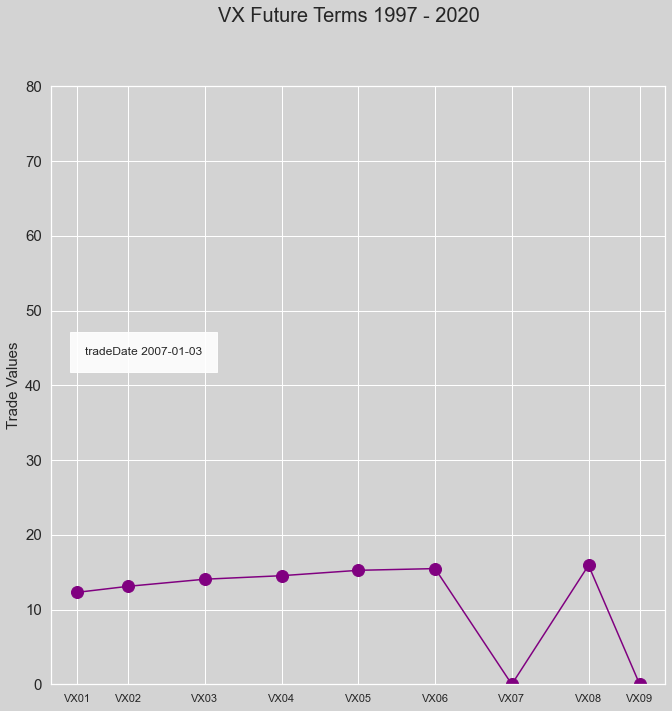

In [97]:
######## Animate VX Futures
## 
sns.set(rc={'axes.facecolor':'lightgrey', 
            'figure.facecolor':'lightgrey','figure.edgecolor':'black',
            'axes.grid':True})
df_x = dfx
df_y = dfy
df_t = dft

Writer = animation.writers['ffmpeg']
writer = Writer(fps=36, metadata=dict(artist='LBB'), bitrate=1800)

fig, ax = plt.subplots(figsize=(11, 11))
fig.suptitle('VX Future Terms 1997 - 2020', fontsize=20)

# either set up sensible limits here that won't change during the animation
# or see the comment in function `update()`
ax.set_xlim(0,24)
ax.set_ylim(0,80)

#ax.set_xlabel('xlabel', fontsize='medium')
ax.set_ylabel('Trade Values', fontsize='medium')

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

ax.set_xticks([1,3,6,9,12,15,18,21,23])
ax.set_xticklabels(['VX01','VX02','VX03','VX04','VX05','VX06','VX07','VX08','VX09'])
ax.tick_params(axis = 'y', which = 'major', labelsize = 15 )

btitle = ax.text(0.15,0.55, "", bbox={'facecolor':'w', 'alpha':0.9, 'pad':15},
                transform=ax.transAxes, ha="center")

graph, = ax.plot([],[], '-o', markersize=12, color='purple')


def get_data_x(i):
    return df_x.loc[i]

def get_data_y(i):
    return df_y.loc[i]

def get_data_t(i):
    return df_t.loc[i]

def update(i):
    x = get_data_x(i)
    y = get_data_y(i)
    t = get_data_t(i)
    graph.set_data(x,y)
    btitle.set_text((('tradeDate {[tradeDate]}'.format(t))))
    btitle.set_fontsize = 15
    # if you don't know the range of your data, you can use the following
    # instructions to rescale the axes.
    #ax.relim()
    #ax.autoscale_view()
    return graph, btitle,


# Creating the Animation object
ani = animation.FuncAnimation(fig, update,  
                              frames=(dfx.index), 
                              interval=700, blit=True)

plt.show()

## It takes a couple of minutes to create either the mpg or the ani_to_html5 video on my machine

#HTML(ani.to_html5_video())# use this option to have the animation play in your notebook, but it is much slower on
# playback than the other option below(saving to an mpg)

ani.save('./Animations/animateVXFutures.mpg', writer=writer) #Use this option to create a mpg file on your local machine
# you can view through VLC, I have already included one in the Animations folder